# Setup

In [ ]:
# Python 3.12 is required for this CODE. Use following commands to install the setup:

# RUN ALL these commands in TERMINAL, not in the notebook.

#!python3.12 -m venv .venv
#!.venv\scripts\activate

#!python -m pip install matplotlib

import numpy as np
import keras
import cv2
from keras import layers

In its original form, the image data is in a 2D form of rows and columns (28, 28), while the ConvNet layers expect 3D form, including the depth dimension. Therefore, we reshape the tensors to have the form (28, 28, 1) appropriate for black and white images.

In addition, all the entries of the tensors are normalized by dividing by 255 as before.

# Prepare data

In [6]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert multi class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


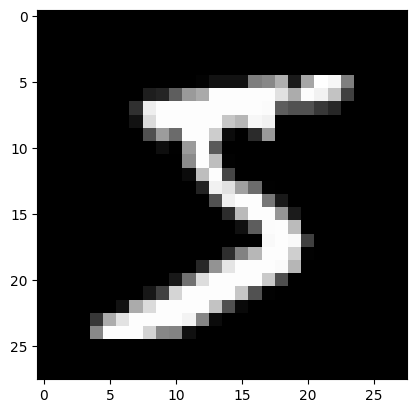

True label = 5


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

sample_number = 0
image = x_train[sample_number]
plt.imshow(image, cmap='gray')
plt.show()

print('True label =',np.argmax(y_train[sample_number]))

# Build the model
The model contains two convolutional layers, with two pooling layers in between them, then flatten layer, dropout layer, and finallu a dense top that performs the actual classification.

Conv2D Layer:

layers.Conv2D(32, kernel_size=(3, 3), activation="relu"):

    This applies 32 convolutional filters, each of size 3×3, to the input image.

    The convolution operation detects features such as edges or patterns in the input.

    The activation function "ReLU" introduces non-linearity, helping the model learn complex patterns.

    The output of this layer is a feature map with 32 channels.

MaxPooling2D Layer:

layers.MaxPooling2D(pool_size=(2, 2)):

    Applies a 2×2 pooling operation to the output of the Conv2D layer.

    Divides the feature map into 2×2 non-overlapping regions and keeps the maximum value from each region.

    Reduces the spatial dimensions (height and width) by half, while keeping the number of channels the same (32 channels from the first Conv2D layer) = keeping the main 
    features





Flatten layer:

layers.Flatten()
    to convert the multi-dimensional feature maps outputted by the convolutional and pooling layers into a 1D vector.

Dropout:

layers.Dropout(0.5):
    During training, this layer randomly sets 50% of its input units (as specified by 0.5) to 0 at each update step in order to prevent overfitting.

Dense:

layers.Dense(num_classes, activation="softmax"):

    num_classes: Specifies the number of output neurons, equal to the number of target classes in the classification problem.

    activation="softmax": Applies the softmax activation function, which converts the outputs into probabilities for each class. The sum of these probabilities equals 1, 
    making it suitable for multi-class classification.

Softmax: all outputs from 0 to 9 are between 0 and 1, and their sum is 1.

In [8]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), # 5*5*24=1600
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [9]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8893 - loss: 0.3644 - val_accuracy: 0.9785 - val_loss: 0.0815
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9656 - loss: 0.1121 - val_accuracy: 0.9845 - val_loss: 0.0562
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0857 - val_accuracy: 0.9877 - val_loss: 0.0480
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0715 - val_accuracy: 0.9900 - val_loss: 0.0437
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9814 - loss: 0.0614 - val_accuracy: 0.9892 - val_loss: 0.0402
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9827 - loss: 0.0543 - val_accuracy: 0.9877 - val_loss: 0.0415
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0534 - val_accuracy: 0.9912 - val_loss: 0.0340
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0467 - val_accuracy: 0.

# Evaluate the trained model

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.024432826787233353
Test accuracy: 0.991599977016449


In [11]:
history_dict = history.history

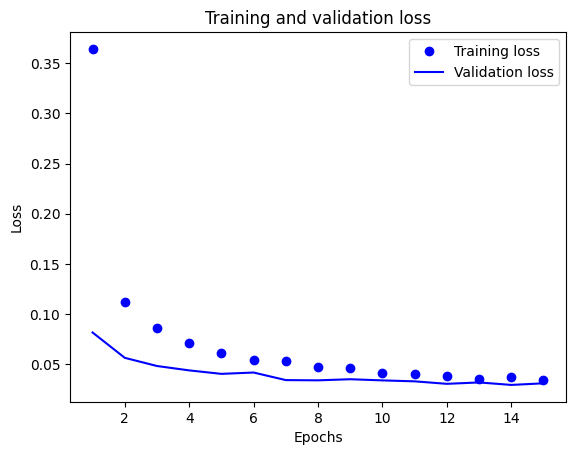

In [12]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

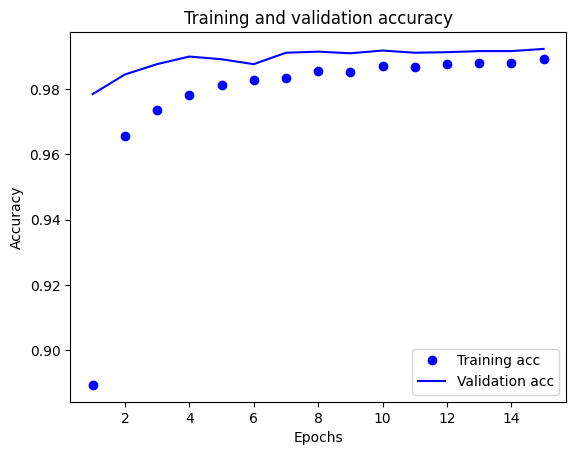

In [13]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# predict and test one sample

Predictions for individual samples can be obtained with the predict method of the model. Predictions and labels for each sample are ten-element vectors; the actual prediction is the index with highest numerical value. This index can be found with the NumPy argmax function.

In [14]:
predictions = model.predict(x_test)

sample_number = 5000
print(predictions[sample_number])
print('Prediction =',np.argmax(predictions[sample_number]))
print('True =',np.argmax(y_test[sample_number]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step
[9.6722836e-15 2.2824012e-11 2.1885386e-07 9.9999249e-01 6.0234933e-12
 5.5037522e-06 7.0425903e-13 1.1173942e-09 1.7496616e-06 1.3698412e-09]
Prediction = 3
True = 3


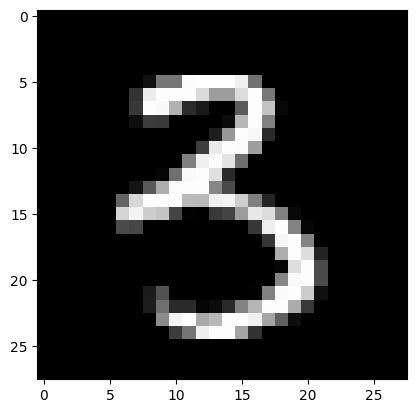

In [15]:
image = x_test[sample_number]
plt.imshow(image, cmap='gray')
plt.show()

# Predicting own photo

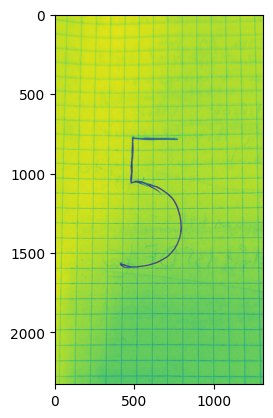

In [45]:
from PIL import Image, ImageOps

# Lataa kuva
image_path = "viisi.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

In [32]:
print(type(image), image.shape)


<class 'numpy.ndarray'> (2327, 1313)


In [33]:
# Blur + threshold
blur = cv2.GaussianBlur(image, (5, 5), 0)
_, thresh = cv2.threshold(
    blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

In [34]:
kernel = np.ones((3, 3), np.uint8)
digit_thick = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
digit_thick = cv2.dilate(digit_thick, kernel, iterations=1)

In [35]:
coords = cv2.findNonZero(digit_thick)
x, y, w, h = cv2.boundingRect(coords)
digit_cropped = digit_thick[y:y+h, x:x+w]

In [37]:
size = 28
digit_resized = cv2.resize(digit_cropped, (20, 20))

canvas = np.zeros((size, size), dtype=np.uint8)
x_offset = (size - 20) // 2
y_offset = (size - 20) // 2

canvas[y_offset:y_offset+20, x_offset:x_offset+20] = digit_resized

In [38]:
digit_normalized = canvas / 255.0
digit_input = digit_normalized.reshape(1, 28, 28, 1)

In [43]:
prediction = model.predict(digit_input)
predicted_class = np.argmax(prediction)

print("Prediction:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction: 2


In [19]:
# Muunna harmaasävyksi
image_gray = image.convert("L")

# Käännä värit: teksti valkoiseksi ja tausta mustaksi
image_inverted = ImageOps.invert(image_gray)

# Muuta koko 28x28 pikseliksi
image_resized = image_inverted.resize((28, 28))

# Muunna NumPy-taulukoksi
image_array = np.array(image_resized)

# Skaalaa arvoja 0-255 välillä -> 0-1 (normalisointi)
image_array_normalized = image_array / 255.0

# Lisää kanavaulottuvuus (28x28 -> 28x28x1)
image_array_final = np.expand_dims(image_array_normalized, axis=-1)

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

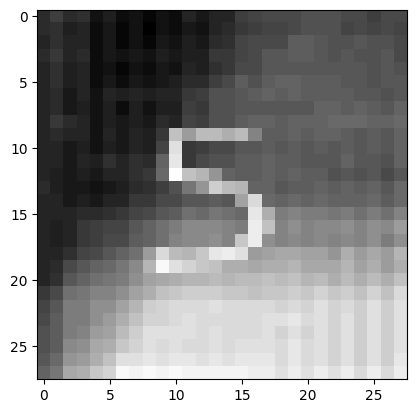

In [ ]:
plt.imshow(image_array_final, cmap='gray')
plt.show()

In [ ]:
image_array_final = np.expand_dims(image_array_final, axis=0) 
image_array_final.shape

(1, 28, 28, 1)

In [ ]:
mypredict = model.predict(image_array_final)
predicted_class = np.argmax(mypredict, axis=1)
print("Predicted class:", predicted_class[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: 1


Need to improve this model training, because it is predicting the number 1 instead of 5.

# predictions for 10 first samples

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step
Predictions to 0: [9.5453445e-10 3.4016914e-11 1.3178012e-06 5.0809393e-07 4.5615248e-12
 5.3236561e-11 3.0325916e-16 9.9999714e-01 2.2830324e-09 1.0241770e-06]
Predicted class: 7
True class: 7
---------------------


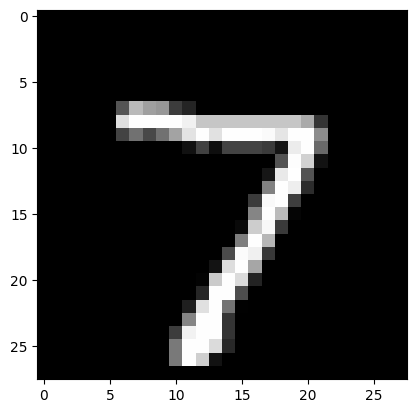

Predictions to 1: [7.5959197e-06 1.1548148e-05 9.9997866e-01 2.7763988e-10 8.5530033e-10
 4.2083700e-13 1.8579768e-06 1.9162605e-10 2.4998411e-07 3.1144566e-11]
Predicted class: 2
True class: 2
---------------------


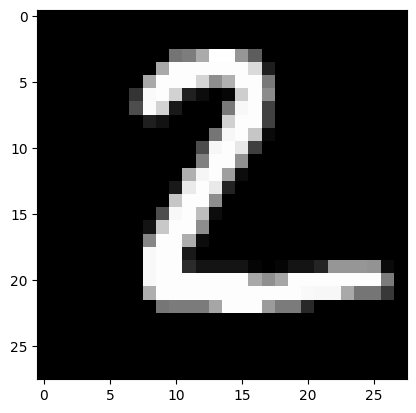

Predictions to 2: [3.6200919e-07 9.9978644e-01 1.8862703e-06 8.5861425e-09 1.9022888e-04
 5.5814567e-08 5.4630533e-07 1.6669683e-05 3.6116312e-06 2.3559824e-07]
Predicted class: 1
True class: 1
---------------------


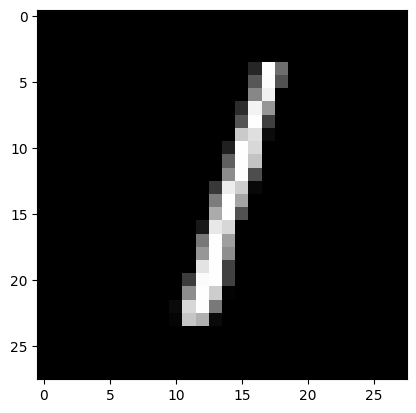

Predictions to 3: [9.99981403e-01 4.27466019e-14 4.14134746e-07 1.47935908e-09
 5.82524784e-08 6.34283950e-08 1.42469944e-05 1.18679155e-08
 1.74722447e-06 2.03896184e-06]
Predicted class: 0
True class: 0
---------------------


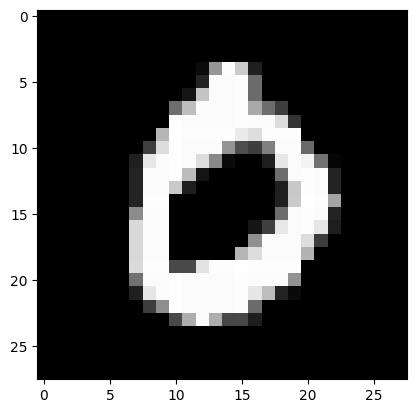

Predictions to 4: [4.5103730e-11 1.9003936e-11 3.3149883e-10 3.9788698e-12 9.9999952e-01
 1.8079615e-13 2.1052145e-10 4.1869845e-09 1.3023252e-09 4.8737655e-07]
Predicted class: 4
True class: 4
---------------------


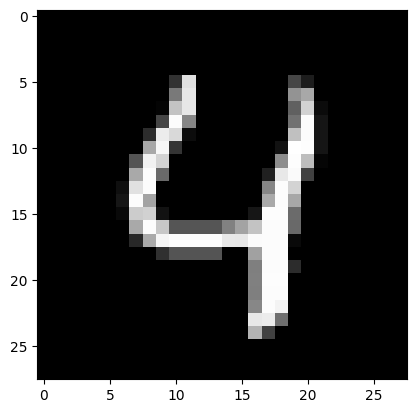

Predictions to 5: [6.0590168e-07 9.9977607e-01 1.6059779e-06 2.1413833e-09 1.6362888e-04
 2.4203670e-09 1.9190168e-07 5.4361695e-05 2.7757762e-06 8.3135831e-07]
Predicted class: 1
True class: 1
---------------------


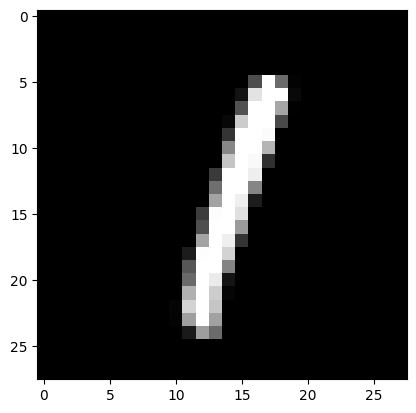

Predictions to 6: [9.4366377e-13 1.0533134e-08 1.7992019e-08 3.4895854e-11 9.9985147e-01
 1.2966434e-08 7.1588672e-11 1.2647782e-06 4.0182211e-05 1.0710186e-04]
Predicted class: 4
True class: 4
---------------------


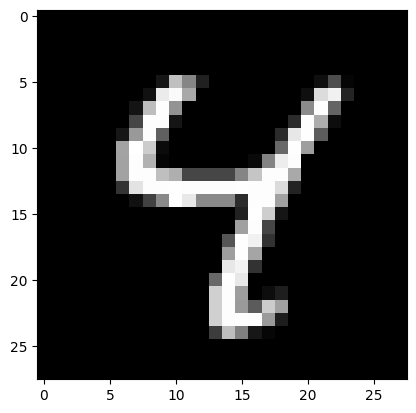

Predictions to 7: [7.1667585e-12 9.9991775e-09 9.7104362e-07 3.9976421e-06 1.7538815e-04
 4.9697377e-07 1.0488090e-11 2.8170332e-08 3.4716137e-05 9.9978441e-01]
Predicted class: 9
True class: 9
---------------------


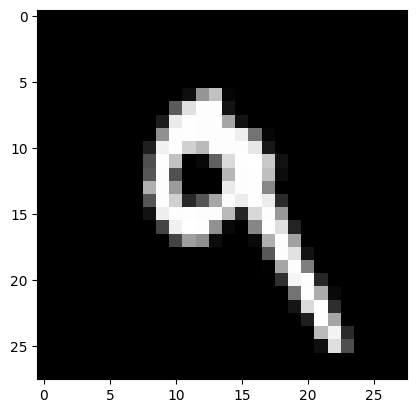

Predictions to 8: [1.8649886e-06 2.0418860e-12 8.2450320e-08 8.0721669e-08 4.6118121e-08
 9.5034826e-01 4.9453788e-02 5.8789528e-08 1.8969089e-04 6.2832951e-06]
Predicted class: 5
True class: 5
---------------------


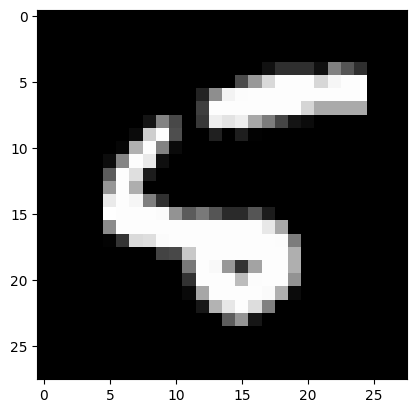

Predictions to 9: [3.4347244e-10 3.4060927e-13 2.4813797e-08 3.6556230e-07 2.3387409e-04
 6.2781957e-09 1.1966964e-12 7.1720999e-05 8.1497034e-05 9.9961251e-01]
Predicted class: 9
True class: 9
---------------------


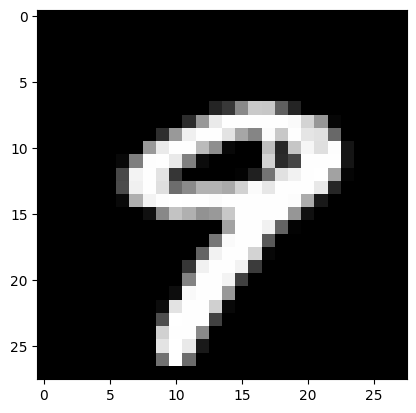

In [ ]:
predictions2 = model.predict(x_test)

# Käydään läpi ensimmäiset 10 ennustetta
for sample_number in range(10):
    # Tulostetaan ennusteet
    print(f"Predictions to {sample_number}:", predictions2[sample_number])

    # Tulostetaan ennustettu luokka ja todellinen luokka
    predicted_class = np.argmax(predictions2[sample_number])
    true_class = np.argmax(y_test[sample_number])

    print("Predicted class:", predicted_class)
    print("True class:", true_class)
    print("---------------------")
    image = x_test[sample_number]
    plt.imshow(image, cmap='gray')
    plt.show()